In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set()
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

## 讀入crime type資料

In [2]:
df1 = pd.read_csv("data/crimeType.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631199 entries, 0 to 631198
Data columns (total 2 columns):
crime_ID        631199 non-null object
crime_type03    631199 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.6+ MB


crime type資料包含二個欄位，crime_ID及crime_type03，應該是犯罪事件編碼及犯罪類型。資料檔有2各欄位，631199筆資料。

In [3]:
df1.head(3)

,crime_ID,crime_type03
0,FFFFFFFFBA677FC9,13
1,FFFFFFFFD8DB4141,13
2,FFFFFFFFDB51030D,14


In [4]:
df1.shape

(631199, 2)

In [103]:
typeTBL={1:"性侵害",2:"故意殺人",3:"強盜",4:"組織犯罪",5:"搶奪",6:"人口販運",7:"洗錢" ,8:"詐欺",9:"汽車竊盜",10:"機車竊盜",11:"竊盜",13:"毒品施用",14:"其他毒品犯罪行為"} 
typeTBLdf = pd.DataFrame.from_dict(typeTBL, orient='index')
typeTBLdf

,0
1,性侵害
2,故意殺人
3,強盜
4,組織犯罪
5,搶奪
6,人口販運
7,洗錢
8,詐欺
9,汽車竊盜
10,機車竊盜


犯罪類型共有10類，1, 2, 3, 5, 8, 9, 10, 11, 13, 14，詳細對應項目待查。每一種犯罪類型的統計次數，如下表

In [85]:
tt = df1.groupby('crime_type03') #依據crime_type03欄位分類
tc = tt.count() #統計每一種犯罪的次數
tcc=pd.merge(typeTBLdf, tc, right_index=True, left_index=True)
tcc

,0,crime_ID
1,性侵害,7935
2,故意殺人,7653
3,強盜,6186
5,搶奪,4695
8,詐欺,183975
9,汽車竊盜,20765
10,機車竊盜,35633
11,竊盜,38846
13,毒品施用,211895
14,其他毒品犯罪行為,113616


In [95]:
tcc.columns=["犯罪類型", '案件記錄數'] # 更改表格欄位名稱
tcc.index = tcc["犯罪類型"]

In [96]:
#製作犯罪類型與次數統計表
#tcc.index.name="犯罪類型"
#tcc.columns.name="次數"
tcc

,犯罪類型,案件記錄數
犯罪類型,,
性侵害,性侵害,7935
故意殺人,故意殺人,7653
強盜,強盜,6186
搶奪,搶奪,4695
詐欺,詐欺,183975
汽車竊盜,汽車竊盜,20765
機車竊盜,機車竊盜,35633
竊盜,竊盜,38846
毒品施用,毒品施用,211895


### 繪製犯罪類型與次數條狀圖

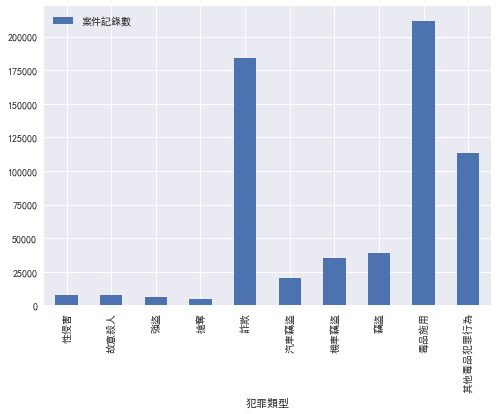

In [97]:
tcc.plot.bar()
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

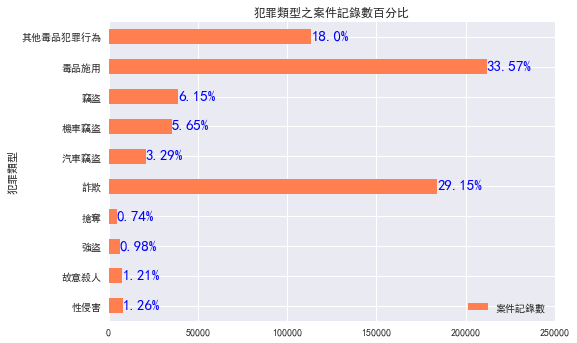

In [104]:
tcc.plot(kind="barh", color="coral", align="center")
total=sum(tcc["案件記錄數"])
for i, v in enumerate(tcc["案件記錄數"]):
    plt.text(v+0.3, i-0.1, str(round(v/total*100,2))+"%", color="blue", fontsize=15)
plt.xlim([0,250000]) 
plt.legend(loc="lower right") 
plt.title("犯罪類型之案件記錄數百分比")

#### 撰寫程式重新整理資料，顯示犯罪ID，犯罪次數，及犯罪類型。
例如

"FFFFFFFFA4AD8487",1,['14']

"FFFFFFFFB9873025",3,['14', '14', '14']

"4592FB68",5,['13', '13', '14', '13', '13']

其中"4592FB68"犯次為5次，5次犯罪中，犯罪類型包含13及14。

原始檔案共有63萬多筆資料，執行此類分析相當耗費時間。執行為結果儲存於crimeout1.csv檔案。

In [34]:
df2 = pd.read_csv("data/crimeout1.csv", header=None)

In [35]:
df2.columns=["crime_ID", "counts", "crime_Type"]

In [36]:
df2.head(5)

,crime_ID,counts,crime_Type
0,FFFFFFFFBA677FC9,1,['13']
1,FFFFFFFFD8DB4141,1,['13']
2,FFFFFFFFDB51030D,1,['14']
3,FFFFFFFFA4AD8487,1,['14']
4,FFFFFFFFD7183C0D,1,['13']


In [37]:
df2["crime_Type"][2000:2010]

2000                ['14']
2001                ['14']
2002                ['14']
2003                ['14']
2004                ['14']
2005                ['13']
2006                ['14']
2007                ['13']
2008    ['14', '14', '14']
2009                ['13']
Name: crime_Type, dtype: object

In [38]:
cc = df2.groupby('counts') #依據犯罪次數欄位分類

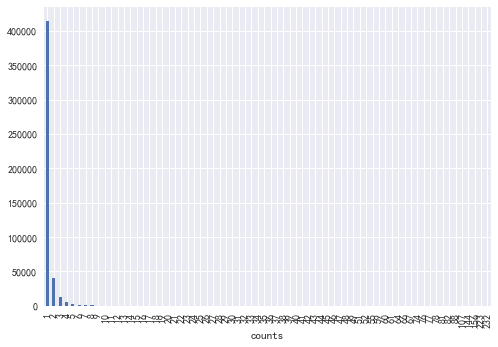

In [105]:
xc=cc.size()
xc.plot(kind="bar")

#### 犯次與人數統計表

In [42]:
count = cc.size()
cgt5 = count[7:70].sum()
dfy = list(count[0:5].values)
dfy.append(cgt5)
countDF = pd.DataFrame({"案件數":dfy, "次數":[1,2,3,4,5,">6"]})
countDF.index=countDF["次數"]
del countDF["次數"]
countDF.transpose()

次數,1,2,3,4,5,>6
案件數,414386,40917,12827,5379,2612,3291


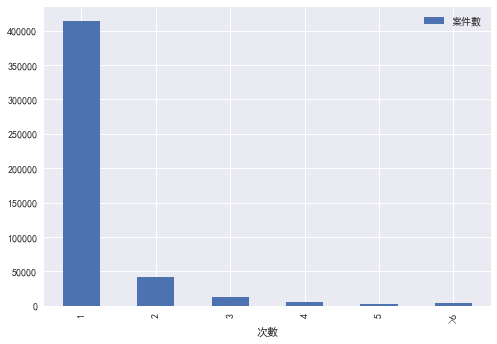

In [43]:
countDF.plot(kind="bar") #繪製條狀圖

In [44]:
df2[df2['counts']==3] #列出犯次3所有資料

,crime_ID,counts,crime_Type
82,5F74BB87,3,"['8', '8', '8']"
105,FFFFFFFFA8D5DE31,3,"['8', '8', '8']"
106,FFFFFFFFA8D5DE50,3,"['8', '8', '8']"
107,FFFFFFFFA8D5DE6F,3,"['8', '8', '8']"
110,FFFFFFFFC6520D56,3,"['8', '8', '8']"
114,FFFFFFFFC66EB59D,3,"['8', '8', '8']"
156,FFFFFFFFF066B165,3,"['8', '8', '8']"
189,FFFFFFFFF437ECE4,3,"['13', '13', '13']"
196,1AF80F42,3,"['13', '13', '13']"
208,1D83C2B1,3,"['14', '14', '14']"


## 讀入犯罪日期資料

In [45]:
from dateutil import parser

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
sns.set()
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False

In [47]:
crimedate_df = pd.read_csv("data/occurDate.csv")

### 資料描述

In [48]:
crimedate_df.shape

(650552, 3)

In [49]:
crimedate_df.ndim

2

In [50]:
crimedate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650552 entries, 0 to 650551
Data columns (total 3 columns):
id           650552 non-null object
crime_ID     650552 non-null object
occurDate    650552 non-null int64
dtypes: int64(1), object(2)
memory usage: 14.9+ MB


In [51]:
crimedate_df.describe()

,occurDate
count,6.505520e+05
mean,2.012599e+07
std,1.980876e+04
min,2.009110e+07
25%,2.011043e+07
50%,2.012121e+07
75%,2.014101e+07
max,2.016073e+07


### 資料整理
日期字串格式改為日期格式

In [52]:
crimedate_df["date"]=crimedate_df["occurDate"].astype(str)

In [53]:
crimedate_df["date1"]=pd.to_datetime(crimedate_df["date"],format='%Y%m%d', errors="coerce")

In [54]:
crimedate_df["date1"].describe()

count                  650301
unique                   2463
top       2010-01-01 00:00:00
freq                      856
first     2009-11-01 00:00:00
last      2016-07-29 00:00:00
Name: date1, dtype: object

note:
   - count=統計每一列非空值有多少個
   - unique=統計每一列唯一非空值出現多少次
   - Top=出現最多的值
   - freq=出現最多值出現的次數

In [55]:
crimedate_df = crimedate_df.drop("date", axis=1)

In [56]:
crimedate_df.set_index("date1", inplace=True)

In [57]:
crimedate_df.head()

,id,crime_ID,occurDate
date1,,,
2011-10-20,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFBA677FC9,20111020
2012-04-21,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFD8DB4141,20120421
2010-03-12,000023aaefc5b81b3cd0b0f238f2f235,FFFFFFFFB526830A,20100312
2010-02-08,00004c2de7c6f4110fc3b0b6676df130,75703FB4,20100208
2013-01-29,0000ab48b06e0bb2cd59f1268fbbebb6,FFFFFFFFDB51030D,20130129


Note:
  - id: 犯罪人編號
  - crime_ID: 犯罪事件編號
  - occurDate: 發生日期
  - date1: 日期格式轉換 for Pandas

In [58]:
crimedate_df.groupby( "crime_ID").size()

crime_ID
1-Feb-39            1
1-Feb-58            1
1.00E+07            1
1.00E+10            2
1.00E+85            1
1.01E+05            1
1.02E+69            1
1.02E+88            1
1.02E+95            1
1.03E+10            1
1.04E+06            1
1.04E+100           2
1.04E+32            2
1.04E+49            2
1.04E+68            1
1.04E+98            1
1.05E+09            9
1.05E+12            1
1.05E+26            1
1.05E+45            2
1.05E+64            1
1.05E+69            2
1.05E+73            1
1.05E+92            1
1.05E+97            1
1.06E+07            1
1.06E+10            1
1.06E+14            2
1.06E+298           1
1.07E+09            1
                   ..
FFFFFFFFFFFA25E1    1
FFFFFFFFFFFA7809    1
FFFFFFFFFFFA7828    4
FFFFFFFFFFFB8E4A    1
FFFFFFFFFFFB8EA7    1
FFFFFFFFFFFB8EC6    1
FFFFFFFFFFFBE9DA    3
FFFFFFFFFFFC5155    1
FFFFFFFFFFFC5ED2    1
FFFFFFFFFFFC5EF1    3
FFFFFFFFFFFC85F3    2
FFFFFFFFFFFC8631    1
FFFFFFFFFFFD3A16    1
FFFFFFFFFFFD3A73    1
F

### 檢查空值

In [59]:
#crimedate_df.isnull()["date1"].count()
crimedate_df.head()

,id,crime_ID,occurDate
date1,,,
2011-10-20,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFBA677FC9,20111020
2012-04-21,00001c9f78ac719e20b4a9fbd9364c03,FFFFFFFFD8DB4141,20120421
2010-03-12,000023aaefc5b81b3cd0b0f238f2f235,FFFFFFFFB526830A,20100312
2010-02-08,00004c2de7c6f4110fc3b0b6676df130,75703FB4,20100208
2013-01-29,0000ab48b06e0bb2cd59f1268fbbebb6,FFFFFFFFDB51030D,20130129


In [60]:
dategroup = crimedate_df.groupby("date1")
datedd = dategroup.size()
type(datedd)

pandas.core.series.Series

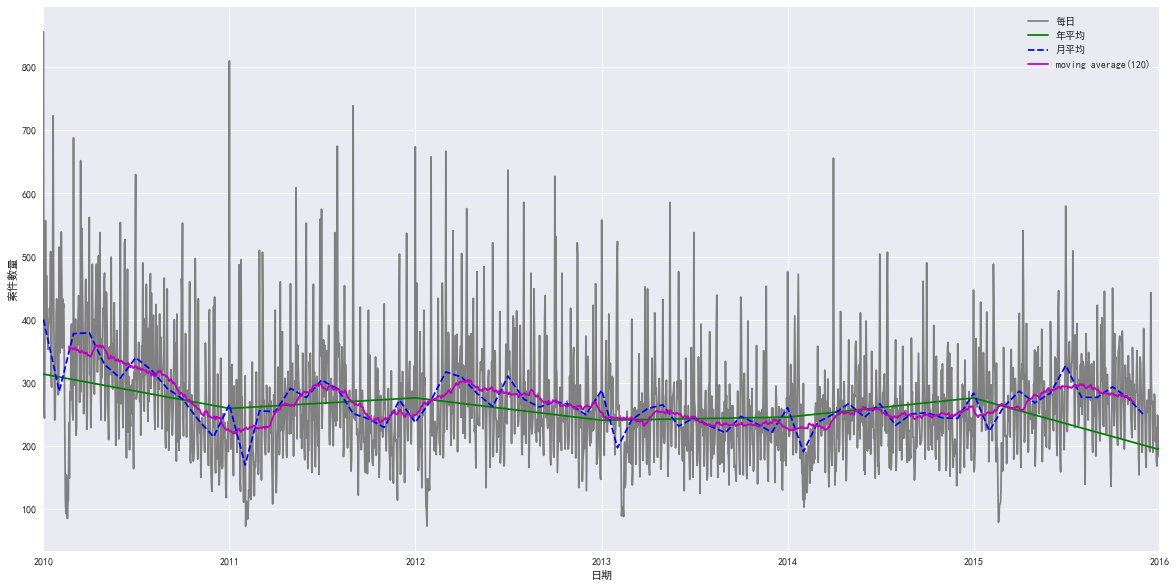

In [61]:
plt.figure(figsize=(20,10))
datedd["2010":"2015"].plot(style="gray")
datedd["2010":"2016"].resample('A').mean().plot(style="g-")
datedd["2010":"2015"].resample("M").mean().plot(style="b--")
datedd["2010":"2015"].rolling(100, center=True).mean().plot(style="m-")
plt.legend(["每日","年平均","月平均","moving average(120)"], loc="upper right")
plt.xlabel("日期")
plt.ylabel("案件數量")

In [62]:
crimedate = crimedate_df.groupby("date1").size()
crimeevent = crimedate_df.groupby("crime_ID").size()
crimepp = crimedate_df.groupby("id").size()

In [63]:
crimedate.head() #日期

date1
2009-11-01    469
2009-11-02    393
2009-11-03    358
2009-11-04    360
2009-11-05    428
dtype: int64

In [64]:
crimeevent.head() #事件

crime_ID
1-Feb-39    1
1-Feb-58    1
1.00E+07    1
1.00E+10    2
1.00E+85    1
dtype: int64

In [65]:
crimepp.head() #犯罪人

id
00001c9f78ac719e20b4a9fbd9364c03    2
000023aaefc5b81b3cd0b0f238f2f235    1
00004c2de7c6f4110fc3b0b6676df130    1
0000ab48b06e0bb2cd59f1268fbbebb6    5
0000e4d962feb060f6eede280a0290f2    1
dtype: int64

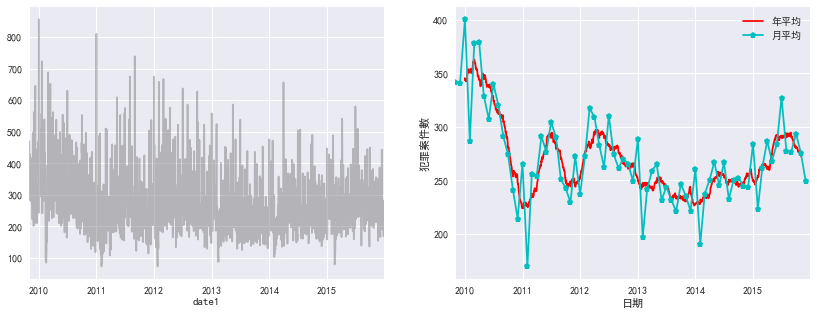

In [66]:
aa = crimedate["2009":"2015"]
fig, ax = plt.subplots(1,2, figsize=(14, 5))
aa.plot(ax=ax[0],c="gray",alpha=0.5)
aa.rolling(120,center=True).mean().plot(ax=ax[1],style='r-')
aa.resample("M").mean().plot(style='cp-')
plt.legend(["年平均","月平均"], loc='upper right')
plt.ylabel('犯罪案件數')
plt.xlabel('日期')

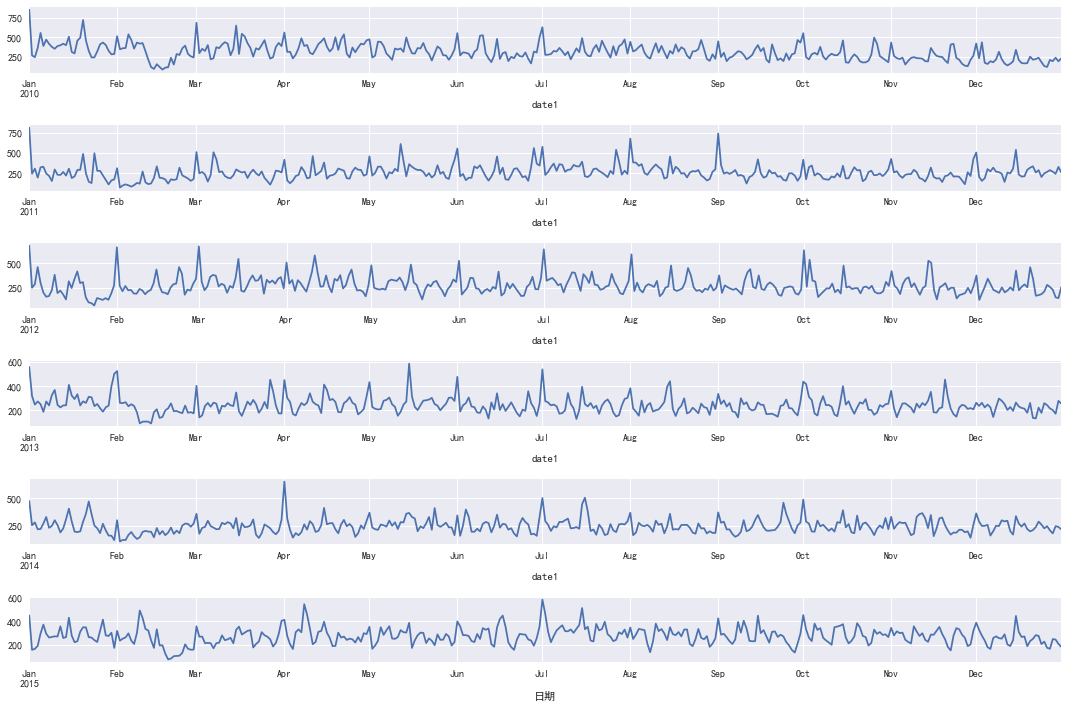

In [67]:
fig, ax = plt.subplots(6, 1, figsize=(15, 10))
crimedate["2010-1-1":"2010-12-31"].plot(ax=ax[0])
crimedate["2011-1-1":"2011-12-31"].plot(ax=ax[1])
crimedate["2012-1-1":"2012-12-31"].plot(ax=ax[2])
crimedate["2013-1-1":"2013-12-31"].plot(ax=ax[3])
crimedate["2014-1-1":"2014-12-31"].plot(ax=ax[4])
crimedate["2015-1-1":"2015-12-31"].plot(ax=ax[5])
plt.xlabel("日期")
plt.tight_layout()

In [68]:
crimedate_df["year"]=crimedate_df["occurDate"]//10000
crimedate_df["month"]=(crimedate_df["occurDate"]%10000)//100
crimedate_df["day"]=crimedate_df["occurDate"]%100

In [69]:
crimedate_df[crimedate_df['year']==0].count()

id           0
crime_ID     0
occurDate    0
year         0
month        0
day          0
dtype: int64

In [70]:
crimedate_df["crime_ID"].nunique() #案件數

484231

In [71]:
crimedate_df["id"].nunique() #犯罪人數

276707

In [72]:
ddcount=crimedate_df.groupby(["crime_ID", "id", "date1"]).count()
ddcount.head(3)

,,,occurDate,year,month,day
crime_ID,id,date1,,,,
1-Feb-39,62ce98b19b749611899b97fd93c7c0f8,2011-03-31,1,1,1,1
1-Feb-58,f396b5a1ab3c882e983a8a8e790c2dc8,2011-05-26,1,1,1,1
1.00E+07,aafbe0ed447f32c39ec0d45fd1076725,2011-12-12,1,1,1,1


In [73]:
ddcount1=crimedate_df.groupby(["crime_ID", "id"]).count()
ddcount1.head()

occurDate  year  month  day
crime_ID id                                                           
1-Feb-39 62ce98b19b749611899b97fd93c7c0f8          1     1      1    1
1-Feb-58 f396b5a1ab3c882e983a8a8e790c2dc8          1     1      1    1
1.00E+07 aafbe0ed447f32c39ec0d45fd1076725          1     1      1    1
1.00E+10 d5e45896c85f53a148b2afb1f47feff4          1     1      1    1
         f2d40bb8fd292906ff1cbe0a1ac4b67a          1     1      1    1

In [74]:
ddcount1=crimedate_df.groupby(["crime_ID", "id"])["crime_ID"].count()
ddcount1.head(10)

crime_ID  id                              
1-Feb-39  62ce98b19b749611899b97fd93c7c0f8    1
1-Feb-58  f396b5a1ab3c882e983a8a8e790c2dc8    1
1.00E+07  aafbe0ed447f32c39ec0d45fd1076725    1
1.00E+10  d5e45896c85f53a148b2afb1f47feff4    1
          f2d40bb8fd292906ff1cbe0a1ac4b67a    1
1.00E+85  10c02411bb1dfd05be295defff1b2fc0    1
1.01E+05  8defd04e59645b740d07bc6d35ffc3a7    1
1.02E+69  ee8de22b970456bd45c47bb379a42f33    1
1.02E+88  ee8de22b970456bd45c47bb379a42f33    1
1.02E+95  db42b415845cac69bc8a0f368b8c63d1    1
Name: crime_ID, dtype: int64

In [75]:
ddcount2=crimedate_df.groupby("crime_ID")["id"].count()
ddcount2.head()

crime_ID
1-Feb-39    1
1-Feb-58    1
1.00E+07    1
1.00E+10    2
1.00E+85    1
Name: id, dtype: int64